In [1]:
import pandas as pd
from sklearn.model_selection import train_test_split
data_url = "https://raw.githubusercontent.com/selva86/datasets/master/BostonHousing.csv"
df= pd.read_csv(data_url)


In [2]:
import pandas as pd  
import numpy as np  
import matplotlib.pyplot as plt 
%matplotlib inline 
import seaborn as sns

In [3]:
import sklearn.datasets as datasets

# List all functions in the datasets module
print([func for func in dir(datasets) if 'load_' in func or 'fetch_' in func])


['fetch_20newsgroups', 'fetch_20newsgroups_vectorized', 'fetch_california_housing', 'fetch_covtype', 'fetch_kddcup99', 'fetch_lfw_pairs', 'fetch_lfw_people', 'fetch_olivetti_faces', 'fetch_openml', 'fetch_rcv1', 'fetch_species_distributions', 'load_breast_cancer', 'load_diabetes', 'load_digits', 'load_files', 'load_iris', 'load_linnerud', 'load_sample_image', 'load_sample_images', 'load_svmlight_file', 'load_svmlight_files', 'load_wine']


In [4]:
df.head()

,crim,zn,indus,chas,nox,rm,age,dis,rad,tax,ptratio,b,lstat,medv
0,0.00632,18.0,2.31,0,0.538,6.575,65.2,4.0900,1,296,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0,0.469,6.421,78.9,4.9671,2,242,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0,0.469,7.185,61.1,4.9671,2,242,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0,0.458,6.998,45.8,6.0622,3,222,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0,0.458,7.147,54.2,6.0622,3,222,18.7,396.90,5.33,36.2


In [5]:
df.rename(columns={'medv': 'price'}, inplace=True)
df.head()


,crim,zn,indus,chas,nox,rm,age,dis,rad,tax,ptratio,b,lstat,price
0,0.00632,18.0,2.31,0,0.538,6.575,65.2,4.0900,1,296,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0,0.469,6.421,78.9,4.9671,2,242,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0,0.469,7.185,61.1,4.9671,2,242,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0,0.458,6.998,45.8,6.0622,3,222,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0,0.458,7.147,54.2,6.0622,3,222,18.7,396.90,5.33,36.2


In [7]:
X = df.iloc[:,:-1]
y = df.iloc[:,-1]

In [8]:
X.head()

,crim,zn,indus,chas,nox,rm,age,dis,rad,tax,ptratio,b,lstat
0,0.00632,18.0,2.31,0,0.538,6.575,65.2,4.0900,1,296,15.3,396.90,4.98
1,0.02731,0.0,7.07,0,0.469,6.421,78.9,4.9671,2,242,17.8,396.90,9.14
2,0.02729,0.0,7.07,0,0.469,7.185,61.1,4.9671,2,242,17.8,392.83,4.03
3,0.03237,0.0,2.18,0,0.458,6.998,45.8,6.0622,3,222,18.7,394.63,2.94
4,0.06905,0.0,2.18,0,0.458,7.147,54.2,6.0622,3,222,18.7,396.90,5.33


In [9]:
y.head()

0    24.0
1    21.6
2    34.7
3    33.4
4    36.2
Name: price, dtype: float64

In [11]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=42)

In [12]:
X_train.head()

,crim,zn,indus,chas,nox,rm,age,dis,rad,tax,ptratio,b,lstat
478,10.23300,0.0,18.10,0,0.614,6.185,96.7,2.1705,24,666,20.2,379.70,18.03
26,0.67191,0.0,8.14,0,0.538,5.813,90.3,4.6820,4,307,21.0,376.88,14.81
7,0.14455,12.5,7.87,0,0.524,6.172,96.1,5.9505,5,311,15.2,396.90,19.15
492,0.11132,0.0,27.74,0,0.609,5.983,83.5,2.1099,4,711,20.1,396.90,13.35
108,0.12802,0.0,8.56,0,0.520,6.474,97.1,2.4329,5,384,20.9,395.24,12.27


In [13]:
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import cross_val_score

lin_reg = LinearRegression()
lin_reg.fit(X_train, y_train)
mse = cross_val_score(lin_reg,X_train, y_train, scoring='neg_mean_squared_error',cv=5)

mse_mean = np.mean(mse)



In [14]:
print(mse_mean)

-25.18787473928514


In [15]:
prediction = lin_reg.predict([[20] + [0]*12])
print(prediction)

[30.75998139]


c:\Users\pasam\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


In [16]:
from sklearn.linear_model import Ridge 
from sklearn.model_selection import GridSearchCV

ridge = Ridge()
params = {'alpha': [1e-15,1e-10,1e-8,1e-3,1e-2,1,5,10,20]}

ridge_regression = GridSearchCV(ridge,params,scoring='neg_mean_squared_error',cv=5)
ridge_regression.fit(X_train, y_train)



GridSearchCV(cv=5, estimator=Ridge(),
             param_grid={'alpha': [1e-15, 1e-10, 1e-08, 0.001, 0.01, 1, 5, 10,
                                   20]},
             scoring='neg_mean_squared_error')

In [17]:
print(ridge_regression.best_params_)
print(ridge_regression.best_score_)
print(ridge_regression.best_index_)

{'alpha': 0.01}
-25.18689936738697
4


In [18]:
from sklearn.linear_model import Lasso
from sklearn.model_selection import GridSearchCV

lasso = Lasso()
params = {'alpha': [1e-15,1e-10,1e-8,1e-3,1e-2,1,5,10,20]}

lasso_regression = GridSearchCV(lasso,params,scoring='neg_mean_squared_error',cv=5)
lasso_regression.fit(X_train, y_train)



c:\Users\pasam\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:697: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 2.729e+03, tolerance: 2.284e+00
  model = cd_fast.enet_coordinate_descent(
c:\Users\pasam\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:697: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 2.558e+03, tolerance: 2.493e+00
  model = cd_fast.enet_coordinate_descent(
c:\Users\pasam\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:697: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the sca

GridSearchCV(cv=5, estimator=Lasso(),
             param_grid={'alpha': [1e-15, 1e-10, 1e-08, 0.001, 0.01, 1, 5, 10,
                                   20]},
             scoring='neg_mean_squared_error')

In [19]:
print(lasso_regression.best_params_)
print(lasso_regression.best_score_)

{'alpha': 1e-15}
-25.18787473928503


In [22]:
y_pred = lasso_regression.predict(X_test)
print(y_pred)

[28.53469469 36.6187006  15.63751079 25.5014496  18.7096734  23.16471591
 17.31011035 14.07736367 23.01064388 20.54223482 24.91632351 18.41098052
 -6.52079687 21.83372604 19.14903064 26.0587322  20.30232625  5.74943567
 40.33137811 17.45791446 27.47486665 30.2170757  10.80555625 23.87721728
 17.99492211 16.02608791 23.268288   14.36825207 22.38116971 19.3092068
 22.17284576 25.05925441 25.13780726 18.46730198 16.60405712 17.46564046
 30.71367733 20.05106788 23.9897768  24.94322408 13.97945355 31.64706967
 42.48057206 17.70042814 26.92507869 17.15897719 13.68918087 26.14924245
 20.2782306  29.99003492 21.21260347 34.03649185 15.41837553 25.95781061
 39.13897274 22.96118424 18.80310558 33.07865362 24.74384155 12.83640958
 22.41963398 30.64804979 31.59567111 16.34088197 20.9504304  16.70145875
 20.23215646 26.1437865  31.12160889 11.89762768 20.45432404 27.48356359
 10.89034224 16.77707214 24.02593714  5.44691807 21.35152331 41.27267175
 18.13447647  9.8012101  21.24024342 13.02644969 21.

In [25]:
df1 = pd.DataFrame(y_pred)
df1.head()

,0
0,28.534695
1,36.618701
2,15.637511
3,25.501450
4,18.709673


In [28]:
y_pred = lasso_regression.predict(X_test)
from sklearn.metrics import r2_score

r2_score = r2_score(y_pred, y_test)

In [29]:
r2_score

0.670955897674443

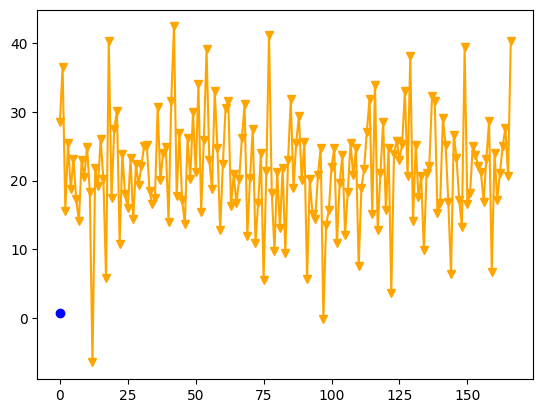

In [37]:
import pandas as pd  
import matplotlib.pyplot as plt 
import seaborn as sns  

fig, ax = plt.subplots()

ax.plot(y_pred, color="orange", marker='v')
ax.plot(r2_score, color="blue", marker="o")

plt.show()

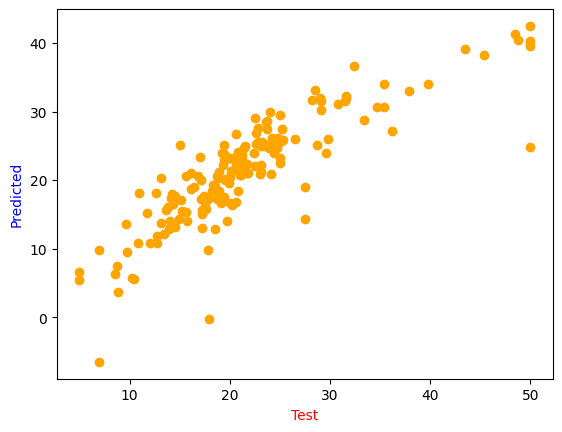

In [48]:
import matplotlib.pyplot as plt 
fig,ax = plt.subplots()
ax.scatter(y_test,y_pred,color="orange")
ax.set_xlabel("Test",color="r")
ax.set_ylabel("Predicted",color="b")


plt.show()

In [52]:
y_pred1 = ridge_regression.predict(X_test)
from sklearn.metrics import r2_score

r2_score = r2_score(y_pred, y_test)
print(r2_score)

0.6709558976744432


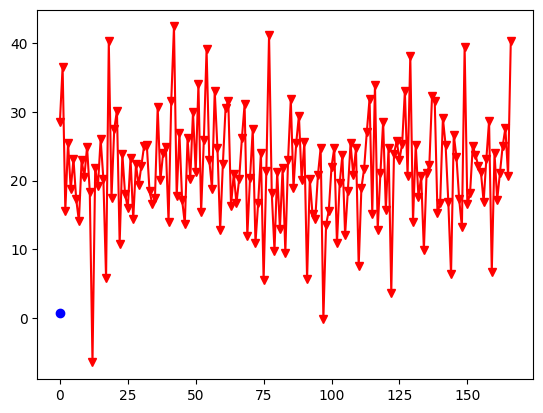

In [54]:
import pandas as pd  
import matplotlib.pyplot as plt 
import seaborn as sns  

fig, ax = plt.subplots()

ax.plot(y_pred1, color="red", marker='v')
ax.plot(r2_score, color="blue", marker="o")

plt.show()

In [53]:
y_pred2 = lin_reg.predict(X_test)
from sklearn.metrics import r2_score

r2_score = r2_score(y_pred, y_test)
print(r2_score)

0.6709558976744432


In [1]:
from sklearn.datasets import load_breast_cancer
x = load_breast_cancer()
x

{'data': array([[1.799e+01, 1.038e+01, 1.228e+02, ..., 2.654e-01, 4.601e-01,
         1.189e-01],
        [2.057e+01, 1.777e+01, 1.329e+02, ..., 1.860e-01, 2.750e-01,
         8.902e-02],
        [1.969e+01, 2.125e+01, 1.300e+02, ..., 2.430e-01, 3.613e-01,
         8.758e-02],
        ...,
        [1.660e+01, 2.808e+01, 1.083e+02, ..., 1.418e-01, 2.218e-01,
         7.820e-02],
        [2.060e+01, 2.933e+01, 1.401e+02, ..., 2.650e-01, 4.087e-01,
         1.240e-01],
        [7.760e+00, 2.454e+01, 4.792e+01, ..., 0.000e+00, 2.871e-01,
         7.039e-02]]),
 'target': array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1,
        0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0,
        0, 0, 1, 0, 1, 1, 1, 1, 1, 0, 0, 1, 0, 0, 1, 1, 1, 1, 0, 1, 0, 0,
        1, 1, 1, 1, 0, 1, 0, 0, 1, 0, 1, 0, 0, 1, 1, 1, 0, 0, 1, 0, 0, 0,
        1, 1, 1, 0, 1, 1, 0, 0, 1, 1, 1, 0, 0, 1, 1, 1, 1, 0, 1, 1, 0, 1,
        1, 1, 1, 1, 1, 1, 1, 0, 0, 0, 1, 0, 0, 1, 1, 1, 0

In [3]:
import pandas as pd 
df = pd.DataFrame(x['data'],columns=x["feature_names"])
df.head()

,mean radius,mean texture,mean perimeter,mean area,mean smoothness,mean compactness,mean concavity,mean concave points,mean symmetry,mean fractal dimension,...,worst radius,worst texture,worst perimeter,worst area,worst smoothness,worst compactness,worst concavity,worst concave points,worst symmetry,worst fractal dimension
0,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,0.2419,0.07871,...,25.38,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890
1,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,0.1812,0.05667,...,24.99,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902
2,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,0.2069,0.05999,...,23.57,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758
3,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,0.2597,0.09744,...,14.91,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300
4,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,0.1809,0.05883,...,22.54,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678


In [4]:
y = pd.DataFrame(x['target'], columns=['Target'])
y

,Target
0,0
1,0
2,0
3,0
4,0
...,...
564,0
565,0
566,0
567,0


In [5]:
X = df.iloc[:]

In [6]:
X.head()

,mean radius,mean texture,mean perimeter,mean area,mean smoothness,mean compactness,mean concavity,mean concave points,mean symmetry,mean fractal dimension,...,worst radius,worst texture,worst perimeter,worst area,worst smoothness,worst compactness,worst concavity,worst concave points,worst symmetry,worst fractal dimension
0,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,0.2419,0.07871,...,25.38,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890
1,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,0.1812,0.05667,...,24.99,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902
2,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,0.2069,0.05999,...,23.57,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758
3,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,0.2597,0.09744,...,14.91,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300
4,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,0.1809,0.05883,...,22.54,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678


In [7]:
y['Target'].value_counts() 

Target
1    357
0    212
Name: count, dtype: int64

In [12]:
#Train Test Split
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.4, random_state=42)

In [20]:
import sklearn
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import GridSearchCV
params = [{'C':[1,5,10]}, {'max_iter':[100,150]}]
model1 = LogisticRegression(C=100, max_iter=100)
model = GridSearchCV(model1, param_grid=params, scoring='f1',cv=5)
model.fit(X_train,y_train)

c:\Users\pasam\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\utils\validation.py:1339: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
c:\Users\pasam\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\linear_model\_logistic.py:469: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
c:\Users\pasam\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\utils\validation.py:1339: DataConversionWarning: A column-vector y was passed w

GridSearchCV(cv=5, estimator=LogisticRegression(C=100),
             param_grid=[{'C': [1, 5, 10]}, {'max_iter': [100, 150]}],
             scoring='f1')

In [21]:
model.best_params_

{'C': 5}

In [22]:
model.best_score_

0.9501267450101363

In [23]:
y_pred = model.predict(X_test)
print(y_pred)

[1 0 0 1 1 0 0 0 1 1 1 0 1 0 1 0 1 1 1 0 1 1 0 1 1 1 1 1 1 0 1 1 1 1 1 1 0
 1 0 1 1 0 1 1 1 1 1 1 1 1 0 0 1 1 1 1 1 0 1 1 1 0 0 1 1 1 0 0 1 1 0 0 1 0
 1 1 1 0 1 1 0 1 1 0 0 0 0 0 1 1 1 1 1 1 1 1 0 0 1 0 0 1 0 0 1 1 1 0 1 1 0
 1 0 0 1 0 1 1 1 0 0 1 1 0 1 0 0 1 1 0 0 0 1 1 1 0 1 1 1 0 1 0 1 1 0 1 0 0
 0 1 0 1 1 1 1 0 0 1 1 1 1 1 1 1 0 1 1 1 1 0 1 1 1 1 1 1 0 1 1 1 1 1 1 0 0
 0 0 1 0 1 0 1 1 1 1 0 1 1 0 1 1 1 0 1 0 0 1 1 1 0 1 1 1 1 0 1 1 1 1 1 0 1
 0 0 1 1 0 1]


In [25]:
from sklearn.metrics import confusion_matrix,classification_report,accuracy_score
confusion_matrix(y_pred,y_test)


array([[ 77,   3],
       [  3, 145]], dtype=int64)

In [26]:
accuracy_score(y_pred,y_test)

0.9736842105263158

In [27]:
print(classification_report(y_pred,y_test))

              precision    recall  f1-score   support

           0       0.96      0.96      0.96        80
           1       0.98      0.98      0.98       148

    accuracy                           0.97       228
   macro avg       0.97      0.97      0.97       228
weighted avg       0.97      0.97      0.97       228

